In [ ]:
#IMPORTING LIBRARIES & DATASETS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

test_dataset = pd.read_csv('test_dataset.csv')  #importing datasets (pandas)
train_dataset = pd.read_csv('train_dataset.csv')

#test_dataset = test_dataset.dropna()  #removed missing data (NaN)
#train_dataset = train_dataset.dropna()

In [ ]:
#TRAIN DATASET INFO
train_dataset.info()
train_dataset.describe()

In [ ]:
#TEST DATASET INFO
test_dataset.info()
test_dataset.describe()

In [ ]:
#FINDING NULL (NaN) VALUES IN TRAIN DATASET
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#FINDING NULL (NaN) VALUES IN TEST DATASET
test_dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


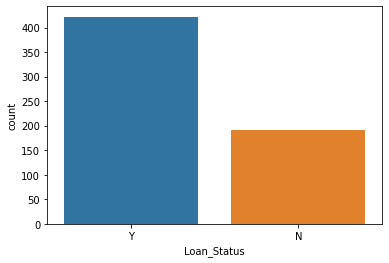

In [ ]:
#VISUALIZING VARIABLES
import seaborn as sns 

#sns.countplot('Gender', data=train_dataset)
#sns.countplot('Married', data=train_dataset)
#sns.countplot('Dependents', data=train_dataset)
#sns.countplot('Education', data=train_dataset)
#sns.countplot('Self_Employed', data=train_dataset)
#sns.countplot('Credit_History', data=train_dataset)
#sns.countplot('Property_Area', data=train_dataset)
#sns.countplot('Loan_Status', data=train_dataset) #koliko jih dobi posojilo in koliko ne (dejansko je to graf y_train)

#sns.countplot('Gender', data=test_dataset)
#sns.countplot('Married', data=test_dataset)
#sns.countplot('Dependents', data=test_dataset)
#sns.countplot('Education', data=test_dataset)
#sns.countplot('Self_Employed', data=test_dataset)
#sns.countplot('Credit_History', data=test_dataset)
#sns.countplot('Property_Area', data=test_dataset)

In [ ]:
#*ali namesto, da ugotovimo preko grafov:
#IŠČEMO VREDNOST, KI SE V STOLPCIH NAJVEČKRAT PONOVI,
#DA BOMO POTEM ZAMENJALI PRAZNE VREDNOSTI (NaN) S TEMI VREDNOSTMI

#test_dataset.Gender.mode() #-> največ je 'Male'
#test_dataset.Married.mode() #-> največ je 'Yes'
#test_dataset.Dependents.mode() #-> največ je '0'
#test_dataset.Education.mode() #-> največ je 'Graduate'
#test_dataset.Self_Employed.mode() #-> največ je 'No'
#test_dataset.Property_Area.mode() #-> največ je 'Urban'

#train_dataset.Gender.mode() #-> največ je 'Male'
#train_dataset.Married.mode() #-> največ je 'Yes'
#train_dataset.Dependents.mode() #-> največ je '0'
#train_dataset.Education.mode() #-> največ je 'Graduate'
#train_dataset.Self_Employed.mode() #-> največ je 'No'
#train_dataset.Property_Area.mode() #-> največ je 'Semiurban'

In [ ]:
#REPLACING THE MISSING DATA OF TRAIN DATASET WITH THE MOST FREQUENT VALUES
#(for 'Gender', 'Married', 'Dependents', 'Education', 
#'Self_Employed', 'Property_Area')
train_values = {'Gender':'Male','Married':'Yes','Dependents':'0','Education':'Graduate','Self_Employed':'No','Property_Area':'Urban'}
train_dataset = train_dataset.fillna(value=train_values)
#print(train_dataset.loc[23].values)

In [ ]:
#FILLING THE MISSING DATA OF TEST DATASET WITH THE MOST FREQUENT VALUES
#(for 'Gender', 'Married', 'Dependents', 'Education', 
#'Self_Employed', 'Property_Area')
test_values = {'Gender':'Male','Married':'Yes','Dependents':'0','Education':'Graduate','Self_Employed':'No','Property_Area':'Semiurban'}
test_dataset = test_dataset.fillna(value=test_values)
#print(test_dataset.loc[11:14].values)

In [ ]:
x_train = train_dataset.iloc[:,1:-1].values
x_test = test_dataset.iloc[:,1:].values
y_train = train_dataset.iloc[:, -1].values

In [ ]:
#print(x_test[11:15])

In [ ]:
#CALCULATING MEAN FOR MISSING DATA
#(for 'ApplicantIncome', 'CoapplicantIncome', 
#'LoanAmount', 'Loan_Amount_Term', 'Credit_History')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[:,5:10])
imputer.fit(x_test[:,5:10])
x_train[:,5:10] = imputer.transform(x_train[:,5:10])
x_test[:,5:10] = imputer.transform(x_test[:,5:10])

In [ ]:
#print(x_test[11:15])

In [ ]:
#ENCODING THE INDEPENDENT VARIABLE 
#(za stolpec 'Property_Area')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(),[10])], remainder = 'passthrough')
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.fit_transform(x_test))
#zakodira 'Property_Area' v 001, 010, 100 
#in da te cifre na začetne tri stolpce

In [ ]:
#ENCODING THE INDEPENDENT VARIABLE 
#(za stolpec 'Dependents')
ct = ColumnTransformer([('encoder', OneHotEncoder(),[5])], remainder = 'passthrough')
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.fit_transform(x_test))
#print(x_train[2])

In [ ]:
#ENCODING THE INDEPENDENT VARIABLE 
#(za ostale kategorijske stolpce)
x_train[x_train=='Male'] = 1
x_train[x_train=='Female'] = 0
x_train[x_train=='Yes'] = 1
x_train[x_train=='No'] = 0
x_train[x_train=='Graduate'] = 1
x_train[x_train=='Not Graduate'] = 0

x_test[x_test=='Male'] = 1
x_test[x_test=='Female'] = 0
x_test[x_test=='Yes'] = 1
x_test[x_test=='No'] = 0
x_test[x_test=='Graduate'] = 1
x_test[x_test=='Not Graduate'] = 0

#print(x_train[2])

In [ ]:
#ENCODING THE DEPENDENT VARIABLE
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train) #'No' zakodira v 0 in 'Yes' zakodira v 1
#print(y_train)

In [ ]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,8:-1] = sc.fit_transform(x_train[:,8:-1])
x_test[:,8:-1] = sc.fit_transform(x_test[:,8:-1])

In [ ]:
#TRAINING THE MODEL (LOGISTIC REGRESSION)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)  #creating the model
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predicted = classifier.predict(x_test)
np.set_printoptions(precision = 2)  #vrne na dve decimalki
#print(type(y_predicted)) #da preverim al je numpy ali pandas oblika
y_conv = y_predicted.reshape(len(y_predicted), 1) #preoblikujemo tabelo, da ima samo en stolpec
#print(y_predicted)
#print(len(y_predicted))  #preverim, če je število elementov v x_test in y_predicted enako
print(y_conv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


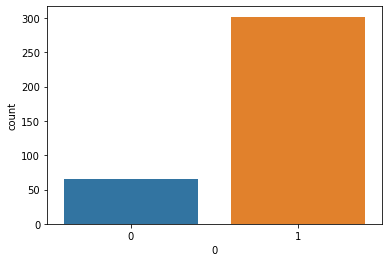

In [ ]:
#VISUALISING y_predicted
#convertamo numpy array v pandas dataframe:
y_df_pandas = pd.DataFrame(y_conv)  
#print(type(y_df_pandas)) #preverim tip tabele
sns.countplot(0, data=y_df_pandas)